### Standard Scaling

In [1]:
import pandas as pd 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
df.Gender = df.Gender.map({'Male': 1, 'Female':0}) 

<Axes: xlabel='Age', ylabel='EstimatedSalary'>

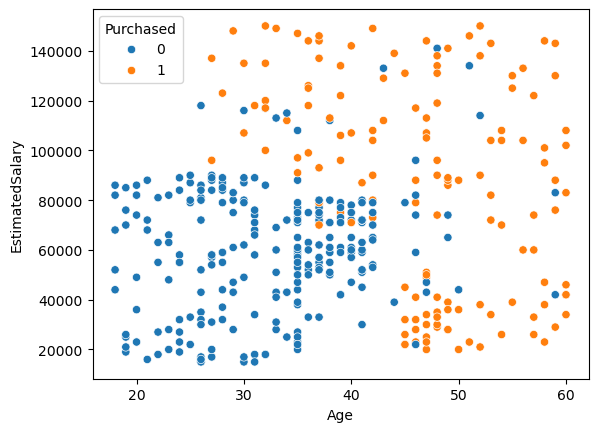

In [4]:
import seaborn as sns
sns.scatterplot(x='Age', y='EstimatedSalary', hue='Purchased', data=df)

In [5]:
X = df.iloc[:, 1:-1]
y = df.iloc[:, -1]


Before scaling

In [6]:
x_train, x_test, Y_train, Y_test = train_test_split(df.iloc[:, 1:-1], df.iloc[:, -1], test_size = 0.25, random_state = 25)

In [7]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()

model = classifier.fit(x_train, Y_train)
Y_pred = model.predict(x_test)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [8]:
from sklearn.metrics import classification_report 

print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.84      0.71      0.77        66
           1       0.57      0.74      0.64        34

    accuracy                           0.72       100
   macro avg       0.70      0.72      0.71       100
weighted avg       0.75      0.72      0.73       100



After scaling

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 25)


In [10]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()

model = classifier.fit(X_train, y_train)
y_pred = model.predict(X_test)

With Logistic Regression

In [12]:
from sklearn.metrics import classification_report 

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83        66
           1       0.70      0.56      0.62        34

    accuracy                           0.77       100
   macro avg       0.75      0.72      0.73       100
weighted avg       0.76      0.77      0.76       100



With KNN

In [13]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

model = knn.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [14]:
y_train_pred = model.predict(X_train)
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93       191
           1       0.88      0.89      0.89       109

    accuracy                           0.92       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.92      0.92      0.92       300



In [15]:
from sklearn.metrics import classification_report 

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94        66
           1       0.84      0.94      0.89        34

    accuracy                           0.92       100
   macro avg       0.90      0.93      0.91       100
weighted avg       0.93      0.92      0.92       100



### Min Max Scaling

In [16]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
wine = pd.read_csv('wine_data.csv')
wine.head()

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
